In [1]:
import pandas as pd
import re
df_train= pd.read_csv('datasets/train.csv')
df_test= pd.read_csv('datasets/test.csv')

In [2]:
survived_train= df_train['Survived']

In [3]:
data= pd.concat([df_train.drop(['Survived'], axis=1), df_test])

In [4]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 97.2+ KB


In [6]:
data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [7]:
data.fillna(data.mean(), inplace=True)

In [8]:
data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [9]:
data['Has_Cabin']= ~data['Cabin'].isnull()

In [10]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

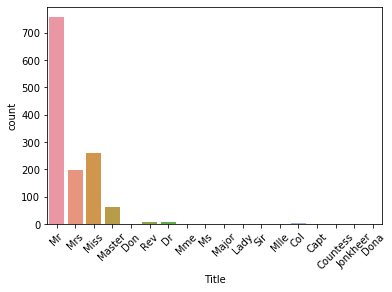

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
data['Title'] = data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45)

In [12]:
data['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [13]:
data['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Don           1
Lady          1
Dona          1
Mme           1
Jonkheer      1
Capt          1
Sir           1
Countess      1
Name: Title, dtype: int64

In [14]:
data['Title'].replace({'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss'}, inplace=True)
data['Title'].replace(['Don', 'Dona', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'], 'Special', inplace=True)

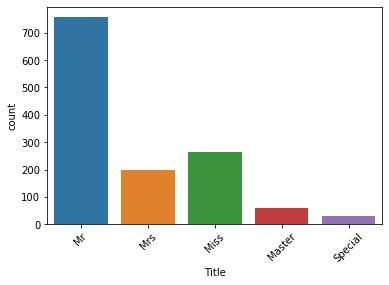

In [15]:
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);
data= data.drop(['Name', 'Cabin', 'PassengerId', 'Ticket'], axis=1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Pclass       1309 non-null int64
Sex          1309 non-null object
Age          1309 non-null float64
SibSp        1309 non-null int64
Parch        1309 non-null int64
Fare         1309 non-null float64
Embarked     1307 non-null object
Has_Cabin    1309 non-null bool
Title        1309 non-null object
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 110.0+ KB


In [17]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title
0,3,male,22.0,1,0,7.2500,S,False,Mr
1,1,female,38.0,1,0,71.2833,C,True,Mrs
2,3,female,26.0,0,0,7.9250,S,False,Miss
3,1,female,35.0,1,0,53.1000,S,True,Mrs
4,3,male,35.0,0,0,8.0500,S,False,Mr


In [18]:
data['Embarked'].fillna('S', inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Pclass       1309 non-null int64
Sex          1309 non-null object
Age          1309 non-null float64
SibSp        1309 non-null int64
Parch        1309 non-null int64
Fare         1309 non-null float64
Embarked     1309 non-null object
Has_Cabin    1309 non-null bool
Title        1309 non-null object
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 110.0+ KB


In [20]:
data['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

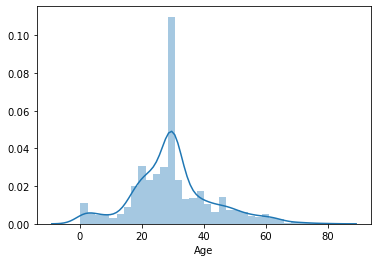

In [21]:
sns.distplot(data['Age'])
plt.show()

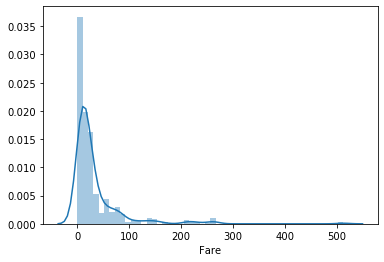

In [22]:
sns.distplot(data['Fare'])
plt.show()

In [23]:
data['CatAge']= pd.qcut(data.Age, q=4, labels= False)


In [24]:
data['CatAge'].value_counts()

1    499
0    333
3    322
2    155
Name: CatAge, dtype: int64

In [25]:
data['CatFare']= pd.qcut(data.Fare, q=4, labels=False)

In [26]:
data['CatFare'].value_counts()

0    337
2    328
3    324
1    320
Name: CatFare, dtype: int64

In [27]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title,CatAge,CatFare
0,3,male,22.0,1,0,7.2500,S,False,Mr,0,0
1,1,female,38.0,1,0,71.2833,C,True,Mrs,3,3
2,3,female,26.0,0,0,7.9250,S,False,Miss,1,1
3,1,female,35.0,1,0,53.1000,S,True,Mrs,2,3
4,3,male,35.0,0,0,8.0500,S,False,Mr,2,1


In [28]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare,CatAge,CatFare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479,1.355997,1.488159
std,0.837836,12.883193,1.041658,0.865560,51.738879,1.109490,1.122833
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,3.000000,29.881138,0.000000,0.000000,14.454200,1.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,31.275000,2.000000,2.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,3.000000,3.000000


In [29]:
data.drop(['Age', 'Fare'], axis=1, inplace=True)

In [30]:
data.head()

,Pclass,Sex,SibSp,Parch,Embarked,Has_Cabin,Title,CatAge,CatFare
0,3,male,1,0,S,False,Mr,0,0
1,1,female,1,0,C,True,Mrs,3,3
2,3,female,0,0,S,False,Miss,1,1
3,1,female,1,0,S,True,Mrs,2,3
4,3,male,0,0,S,False,Mr,2,1


In [31]:
data['Fam_Size'] = data.Parch + data.SibSp
data = data.drop(['SibSp','Parch'], axis=1)
data.head()

,Pclass,Sex,Embarked,Has_Cabin,Title,CatAge,CatFare,Fam_Size
0,3,male,S,False,Mr,0,0,1
1,1,female,C,True,Mrs,3,3,1
2,3,female,S,False,Miss,1,1,0
3,1,female,S,True,Mrs,2,3,1
4,3,male,S,False,Mr,2,1,0


In [32]:
data_dum= pd.get_dummies(data, drop_first=True)

In [33]:
data_dum.head()

,Pclass,Has_Cabin,CatAge,CatFare,Fam_Size,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,3,False,0,0,1,1,0,1,0,1,0,0
1,1,True,3,3,1,0,0,0,0,0,1,0
2,3,False,1,1,0,0,0,1,1,0,0,0
3,1,True,2,3,1,0,0,1,0,0,1,0
4,3,False,2,1,0,1,0,1,0,1,0,0


In [34]:
data_train= data_dum.iloc[:891]
data_test= data_dum.iloc[891:]

In [35]:
X= data_train.values
y= survived_train.values
test= data_test.values

In [37]:
import numpy as np
dep= np.arange(1,9)
param_grid= {'max_depth': dep }

In [39]:
from sklearn import tree
clf= tree.DecisionTreeClassifier()

In [43]:
from sklearn.model_selection import GridSearchCV
clf_cv= GridSearchCV(clf, param_grid= param_grid, cv=5)

In [45]:
clf_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8])},
      

In [47]:
print("Tuned Decision Tree Parameters {}".format(clf_cv.best_params_))
print("Best score {}".format(clf_cv.best_score_))

Tuned Decision Tree Parameters {'max_depth': 3}
Best score 0.8293766869625259


In [48]:
Y_pred= clf_cv.predict(test)

In [49]:
df_test['Survived']= Y_pred

In [53]:
df_test[['PassengerId', 'Survived']].to_csv('datasets/predictions.csv', index=False)